### 🎯 Goal

* Detect faces and eyes in an image or live webcam feed using OpenCV’s built-in Haar Cascade classifiers.

#### 🧠 Concept Overview

* Haar Cascades are pre-trained classifiers based on classical computer-vision features (Haar features + AdaBoost).
* They are lightweight and fast — perfect for learning how traditional object detection worked before CNNs.

In [27]:
import cv2
import matplotlib.pyplot as plt

In [28]:
def show(img, cmap=None):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img, cmap)
    plt.axis('off')
    plt.show()

In [29]:
# Load the pre-trained Haar Cascade models from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

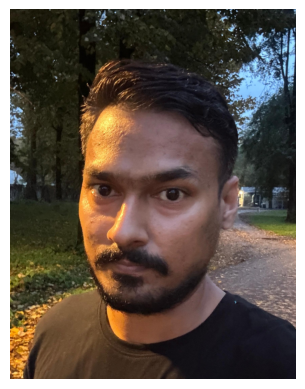

In [30]:
# Load an image
img = cv2.imread('./media/me.jpeg')

if img is None:
    print('Error: Image not found!')
    exit()

show(img)

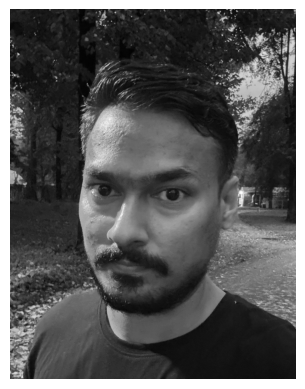

In [31]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray, 'gray')

##### Detect Faces and Eyes

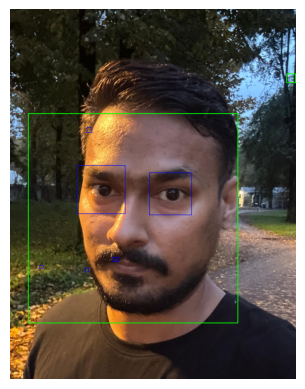

In [32]:
# Detect faces (returns list of rectangles)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

for(x, y, w, h) in faces:
    # Draw rectangle aound each detected face
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Region of interest for eyes within the face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)
    
show(img)

##### Live Webcam Detection

In [33]:
cap = cv2.VideoCapture(0)   # open webcam (0 = default camera)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Face detection
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 1)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        # Eyes detection
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        for(ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 1)
        
    cv2.imshow('Live Face & Eye Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()